# Titanic Dataset EDA

This notebook performs **data cleaning** and **exploratory data analysis (EDA)** on the Titanic dataset to identify patterns and trends.


Import Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Loading Data

In [11]:
df = pd.read_csv("train.csv")
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [12]:

df.info()

df.describe()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Cleaning

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(columns=['Cabin'], inplace=True, errors='ignore')

print("Missing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Survival Count

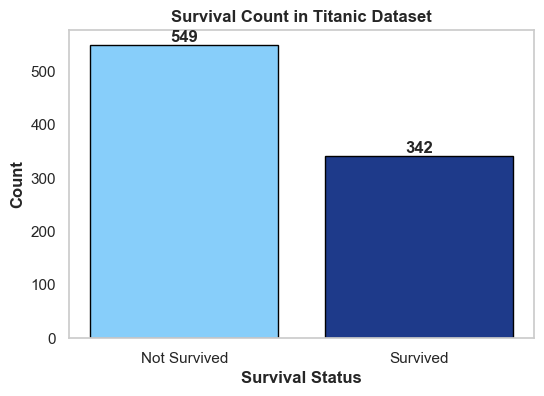

In [21]:
survival_counts = df['Survived'].value_counts()

labels = ['Not Survived', 'Survived']

plt.figure(figsize=(6,4))

plt.bar(
    labels,
    survival_counts.values,
    color=['#87CEFA', '#1E3A8A'],  
    edgecolor='black'
)

plt.xlabel("Survival Status", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("Survival Count in Titanic Dataset", fontweight='bold')

plt.grid(False)

for i, value in enumerate(survival_counts.values):
    plt.text(i, value + 5, str(value), ha='center', fontweight='bold')

plt.show()




Survival by Gender

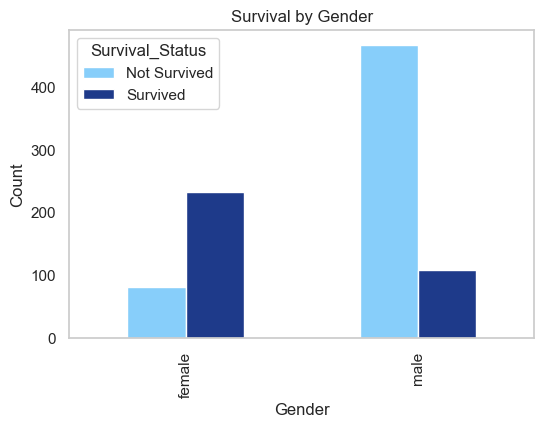

In [36]:
import matplotlib.pyplot as plt

gender_survival = df.groupby(['Sex', 'Survival_Status']).size().unstack()

gender_survival.plot(
    kind='bar',
    stacked=False,
    color=['#87CEFA', '#1E3A8A'],  
    figsize=(6,4),
)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Survival by Gender")

plt.grid(False)

plt.show()





Survival by Passenger Class (Pclass)

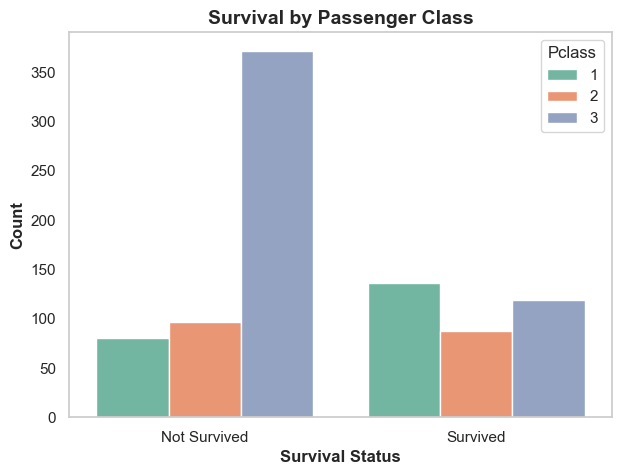

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(x='Survival_Status', hue='Pclass', data=df, palette='Set2')
plt.title("Survival by Passenger Class", fontweight='bold', fontsize=14)
plt.xlabel("Survival Status", fontweight='bold', fontsize=12)
plt.ylabel("Count", fontweight='bold', fontsize=12)
plt.grid(False)
plt.show()



Age Distribution

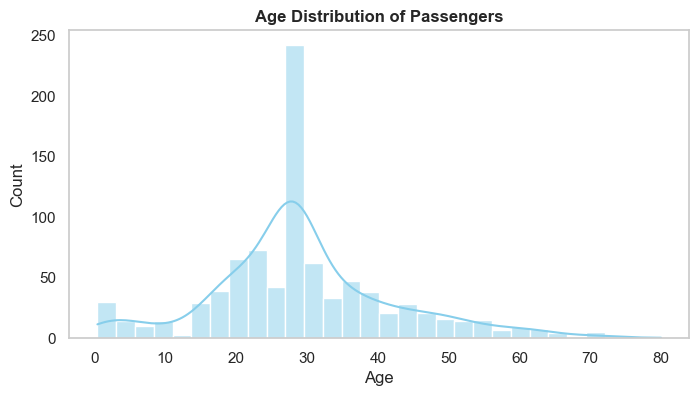

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Passengers", fontweight='bold')
plt.grid(False)
plt.show()




Correlation Heatmap

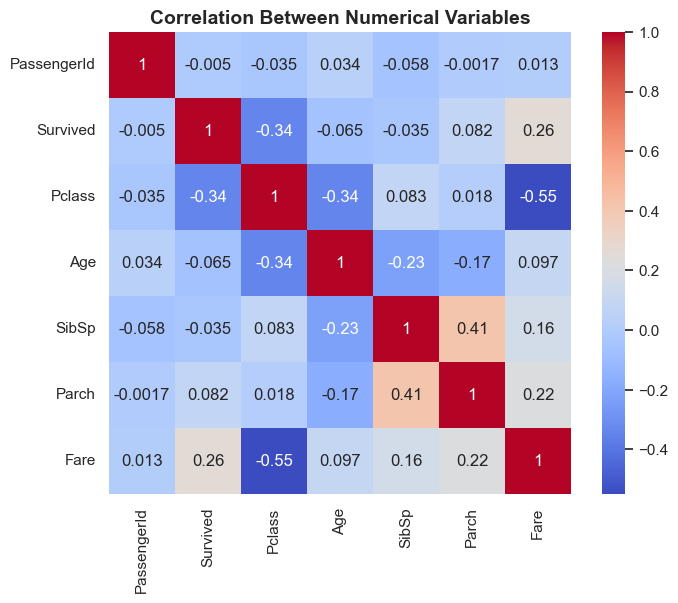

In [39]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Between Numerical Variables", fontweight='bold', fontsize=14)
plt.show()


